In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

import MARBLE
from MARBLE import plotting, dynamics

# For initial conditions, sample a rectangle uniformly

In [19]:
t0, t1, dt = 0, 2, 0.2
t = np.arange(t0, t1, dt)
n = 20
area = [[-3, -3],[3, 3]]

# Geneate phase portraits from random initial conditions while varying $\beta_1$

In [84]:
X0_range = dynamics.initial_conditions(n, 1, area, seed=11)[0]
pos, vel = dynamics.simulate_vanderpol(0.5, X0_range, t)
pos, vel = dynamics.embed_parabola(pos, vel, alpha=0.5)

<Axes: >

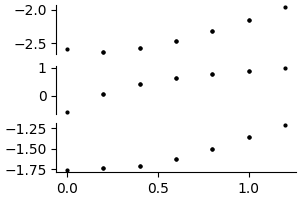

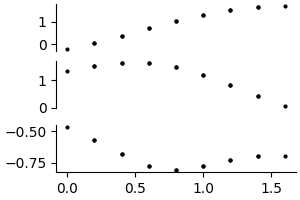

In [85]:
plotting.time_series(t, list(pos[0].T), style='.', figsize=(3,2), ms=4)
plotting.time_series(t, list(pos[1].T), style='.', figsize=(3,2), ms=4)

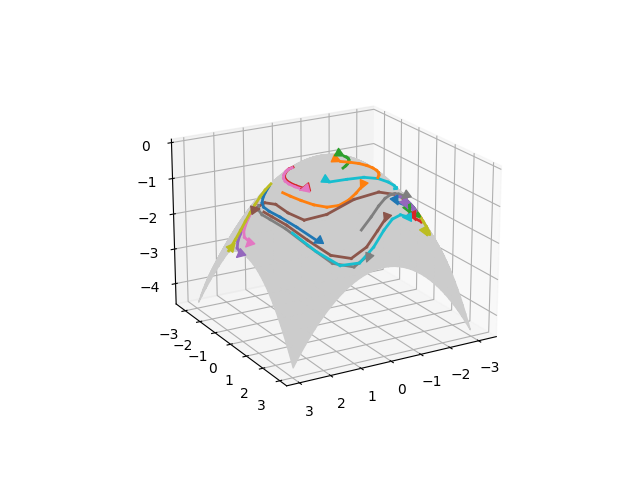

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

from matplotlib.colors import LightSource

X, Y = np.mgrid[-3.:3.:0.05, -3.:3.:0.05]
xyz = np.array(dynamics.parabola(X.flatten(), Y.flatten(), alpha=0.5))
ls = LightSource(azdeg=30,altdeg=30)
rgb = ls.shade(xyz[:,2].reshape(X.shape)-0.1, plt.cm.gray)


ax.plot_surface(X, Y, xyz[:,2].reshape(X.shape),
                color='0.8', 
                shade=True,
                lightsource=ls,
                facecolors=rgb,
                zorder=0
               )

ax = plotting.plot_phase_portrait(pos, vel, ax=ax,style='-', lw=2,
                         node_feature=[[i]*len(p) for i, p in enumerate(pos)])
ax = plotting.plot_phase_portrait(pos, vel, ax=ax,style='>', scale=10, lw=15, spacing=10,
                         node_feature=[[i]*len(p) for i, p in enumerate(pos)])

ax.view_init(elev=20, azim=60)
plt.savefig('vanderpol_short_traj.pdf')

In [90]:
pos_concat, vel_concat = np.vstack(pos), np.vstack(vel)
data = MARBLE.construct_dataset(pos_concat, features=vel_concat, graph_type='cknn', k=15, stop_crit=0.03, vector=False)

---- Embedding dimension: 3
---- Signal dimension: 3

Vector computations are disabled

---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 


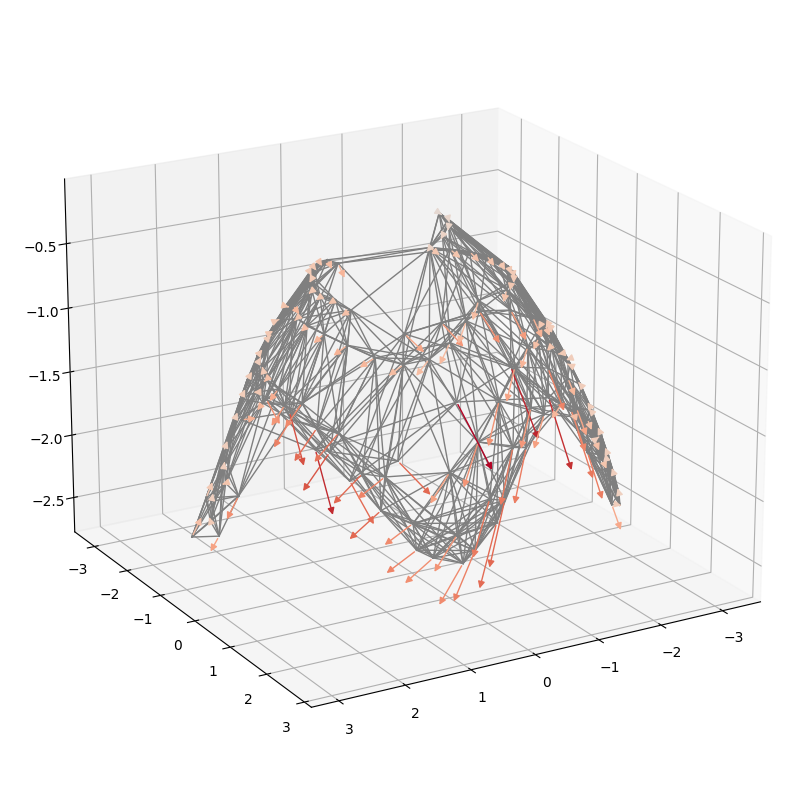

In [101]:

ax = plotting.fields(data, col=1, alpha=1, width=10, edge_width=1.0, scale=5, view=[70, 25])
"""

ax[0].plot_surface(X, Y, xyz[:,2].reshape(X.shape),
                color='0.8', 
                alpha=0.1,
                shade=True,
                lightsource=ls,
                facecolors=rgb,
                zorder=0
               )
ax[0].plot_surface(X, Y, xyz[:,2].reshape(X.shape)-0.01,
                color='0.8', 
                shade=True,
                alpha=0.8,
                lightsource=ls,
                facecolors=rgb,
                zorder=-1000
               )
      """

ax[0].view_init(elev=20, azim=60)
plt.savefig('vanderpol_graph.pdf')

In [102]:
params = {'epochs': 75, #optimisation epochs
       'order': 2, #order of derivatives
       'hidden_channels': 32, #number of internal dimensions in MLP
       'out_channels': 4,
       'inner_product_features': True,
      }

model = MARBLE.net(data, params=params)
model.run_training(data)


---- Settings: 

epochs : 75
order : 2
hidden_channels : 32
out_channels : 4
inner_product_features : True
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  13
---- Total number of parameters:  698

---- Training network ...

Epoch: 0, Training loss: 1.369316, Validation loss: 1.3592, lr: 0.0100 *
Epoch: 1, Training loss: 1.364346, Validation loss: 1.3606, lr: 0.0100
Epoch: 2, Training loss: 1.358266, Validation loss: 1.3639, lr: 0.0100
Epoch: 3, Training loss: 1.355100, Validation loss: 1.3495, lr: 0.0100 *
Epoch: 4, Training loss: 1.370576, Validation loss: 1.3560, lr: 0.0100
Epoch: 5, Training loss: 1.351379, Validation loss: 1.3618, lr: 0.0100
Epoch: 6, Training loss: 1.370218, Validation loss: 1.3602, lr: 0.0100
Epoch: 7, Training loss:

Performed umap embedding on embedded results.


<Axes: >

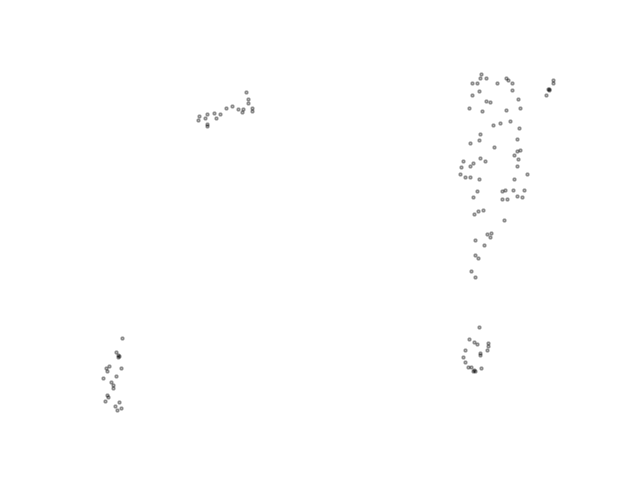

In [103]:
data = model.evaluate(data)
data = MARBLE.cluster_embeddings(data, n_clusters=10)
plotting.embedding(data)